<a href="https://colab.research.google.com/github/F-Abir/GEE-Python-API/blob/main/Dayeee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ee
import geemap
!pip install xee
import xee
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.7 MB/s eta 0:00:00


In [ ]:
ee.Authenticate()
ee.Initialize(
    project = 'ee-abirnahraf',
)

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_7TDKVSyKvBdmMqW?ref=4i2o6


In [ ]:
roi = map.draw_last_feature.geometry()

roi


ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          90.340576,
                          23.668424
                        ],
                        [
                          90.340576,
                          23.90781
                        ],
                        [
                          90.492325,
                          23.90781
                        ],
                        [
                          90.492325,
                          23.668424
                        ],
                        [
                          90.340576,
                          23.668424
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [ ]:
temp = (
    ee.ImageCollection("MODIS/061/MOD11A2")
    .filterDate('2001','2025')
    .select('LST_Day_1km')
    .map(lambda img: img.multiply(0.02).subtract(273.15).copyProperties(img, img.propertyNames()))
)

temp

In [ ]:
xtemp = xr.open_dataset(
    temp,
    engine = 'ee',
    crs = 'EPSG:4326',
    scale = 0.01,
    geometry = roi
)

xtemp

<xarray.Dataset> Size: 2MB
Dimensions:      (time: 1103, lon: 15, lat: 24)
Coordinates:
  * time         (time) datetime64[ns] 9kB 2001-01-01 2001-01-09 ... 2024-12-26
  * lon          (lon) float64 120B 90.35 90.36 90.37 ... 90.47 90.48 90.49
  * lat          (lat) float64 192B 23.67 23.68 23.69 23.7 ... 23.88 23.89 23.9
Data variables:
    LST_Day_1km  (time, lon, lat) float32 2MB ...
Attributes:
    crs:      EPSG:4326

In [ ]:
xtemp_mean = xtemp.mean(dim  = ['lon', 'lat'])


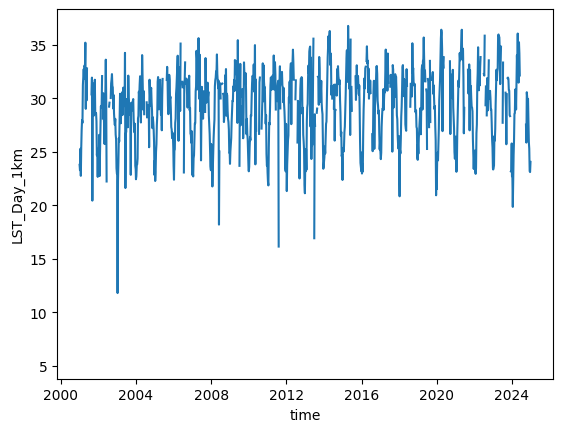

In [ ]:
xtemp_mean.LST_Day_1km.plot()

xtemp_inte = xtemp_mean.interpolate_na(dim = 'time')

xtemp_df = xtemp_inte.to_dataframe()

xtemp_df.to_csv('temp_df.csv')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

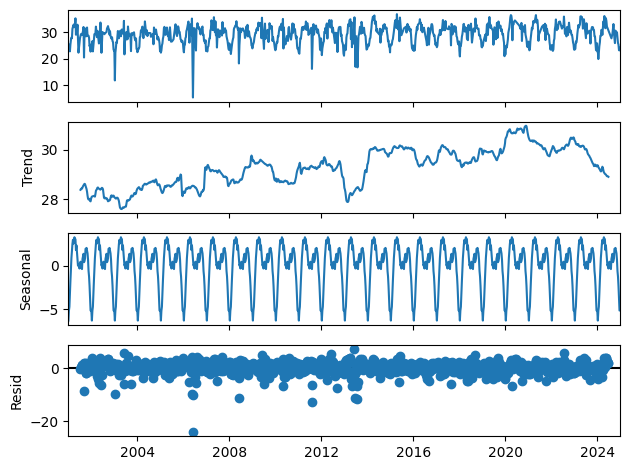

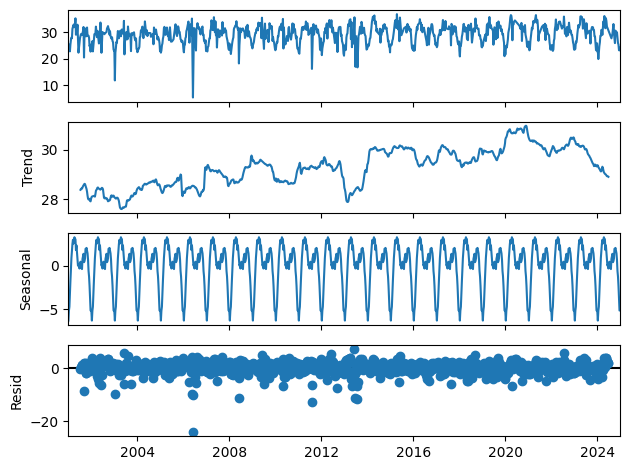

In [ ]:
model = seasonal_decompose(
    xtemp_df,
    model = 'additive',
    period = 46
)

model.plot()

In [ ]:
plt.show()

In [ ]:
final_df = pd.DataFrame({
    'time': model.observed.index,
    'observations': model.observed.values,
    'trend': model.trend.values,
    'seasonal': model.seasonal.values,
    'residuals': model.resid.values
})

In [ ]:
final_df = final_df.set_index('time')

<Axes: xlabel='time'>

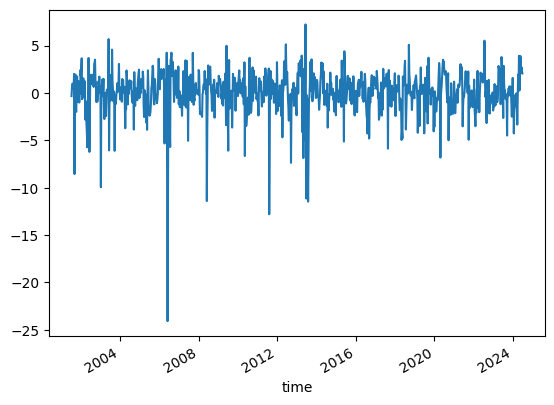

In [ ]:
final_df.residuals.plot()

In [ ]:
final_df.to_csv('temp_anomaly.csv')

In [ ]:
pos = final_df[final_df['residuals'] >= 0]
neg = final_df[final_df['residuals'] < 0]

<BarContainer object of 484 artists>

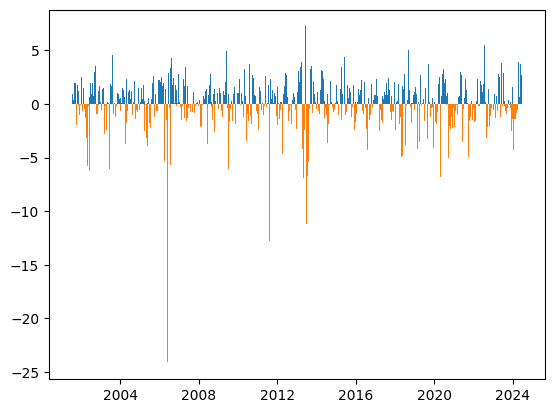

In [ ]:
plt.bar(pos.index, pos.residuals, width = 10)
plt.bar(neg.index, neg.residuals, width = 10)

In [ ]:
!pip -q install nbformat

import nbformat as nbf

# 👇 Your working notebook file
in_file  = "Day.ipynb"
# 👇 GitHub-safe cleaned copy
out_file = "Day.ipynb"

nb = nbf.read(in_file, as_version=4)

# Remove widget metadata (the GitHub error comes from here)
nb.metadata.pop("widgets", None)

# Clear outputs (removes widget state)
for cell in nb.cells:
    if cell.cell_type == "code":
        cell.outputs = []
        cell.execution_count = None

nbf.write(nb, out_file)
print("✅ Clean notebook saved as:", out_file)


FileNotFoundError: [Errno 2] No such file or directory: 'Day.ipynb'